In [1]:
import sys
print sys.executable

/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python


In [63]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pipeline import *
from data_utils import *
from utils import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tflearn.data_utils import to_categorical, pad_sequences
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
model_id='simple_cnn'
dataset='cifar10'

X, Y, X_test, Y_test = load_data(dataset, num_training=1000, num_test=1000)
n_classes = DATASET_TO_N_CLASSES[dataset]

Attempting to load dataset cifar10 ...
loading cifar batch training batch 1 of 5
loading cifar batch training batch 2 of 5
loading cifar batch training batch 3 of 5
loading cifar batch training batch 4 of 5
loading cifar batch training batch 5 of 5
loading cifar batch testing batch 1 of 1
120.707565124
63.3055834253


In [103]:

hidden_reps = None
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    print "loading model"
    hidden_rep_model = load_model(model_id, n_classes=n_classes, checkpoint_model_id=model_id, is_training=False, get_hidden_reps=True)
    hidden_reps = np.array(hidden_rep_model.predict(X_test))

print hidden_reps.shape


loading model
Loading model...
../tensorboard_logs/simple_cnn/
../checkpoints/simple_cnn/
../best_checkpoints/simple_cnn/
Checkpoint loaded.
Model loaded.
(1000, 512)


In [108]:
y_test = np.argmax(Y_test, axis=1,dtype="int")
y = np.array(np.argmax(Y, axis=1),dtype="int")

TypeError: argmax() got an unexpected keyword argument 'dtype'

In [105]:
# Use PCA for dimensionality reduction (faster than T-SNE for high dimensional data)
pca = PCA(n_components=5)
pca_results = pca.fit_transform(hidden_reps)

In [106]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=0)
tsne_results = tsne_model.fit_transform(pca_results)
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])

In [107]:
label_names = load_cifar10_label_names()

In [ ]:
# on training data

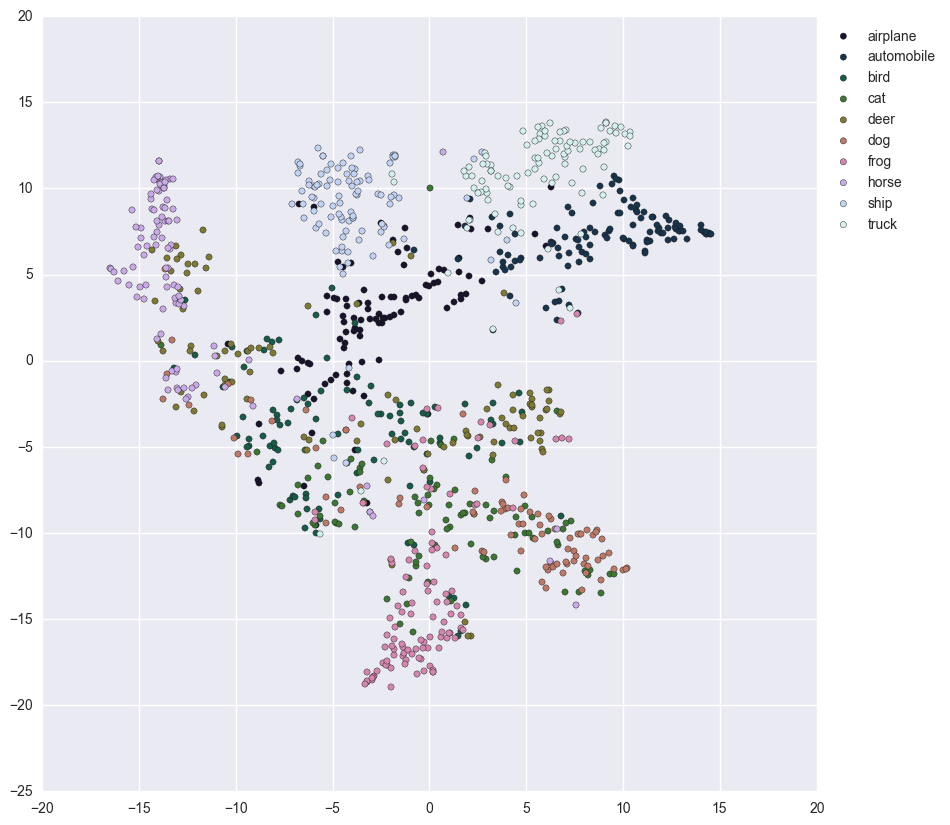

In [101]:

sns.set_palette("Set2", 10)
colors =sns.color_palette("cubehelix",10)

plt.figure(figsize=(10,10))
for label in xrange(n_classes):
    points_0, points_1 = [], []
    for i in xrange(len(dim_0)):
        if y[i] == label:
            points_0.append(dim_0[i])
            points_1.append(dim_1[i])
            
    plt.scatter(points_0, points_1, c=colors[label], label=label_names[label])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

In [ ]:
# on test data

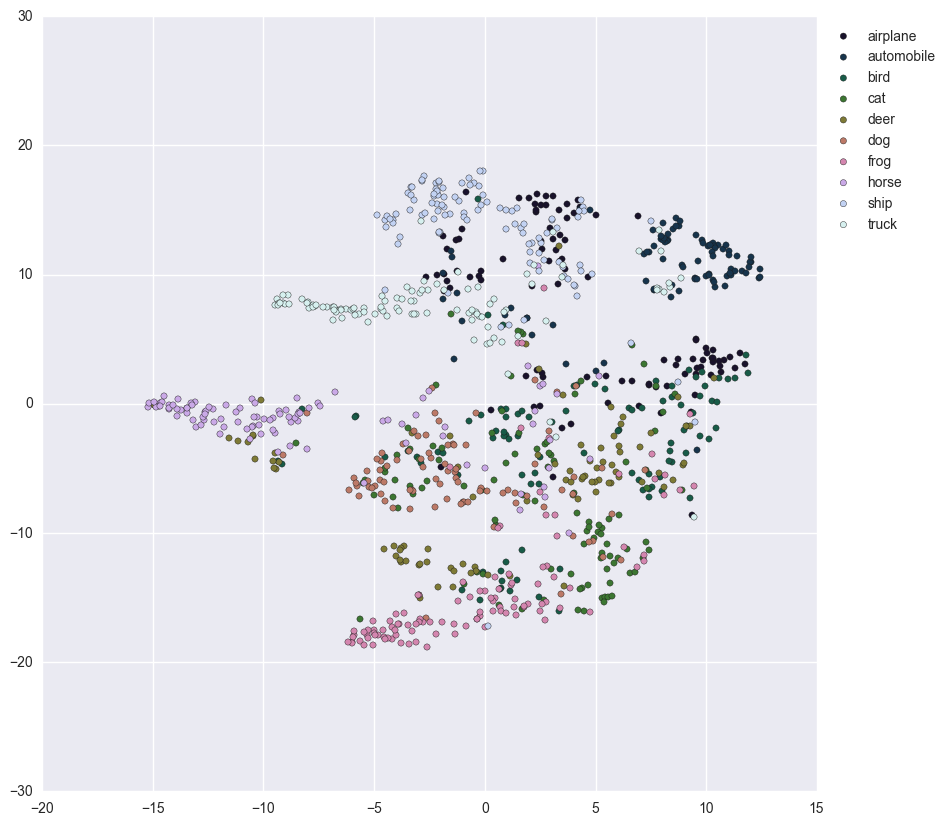

In [109]:
plt.figure(figsize=(10,10))
for label in xrange(n_classes):
    points_0, points_1 = [], []
    for i in xrange(len(dim_0)):
        if y_test[i] == label:
            points_0.append(dim_0[i])
            points_1.append(dim_1[i])
            
    plt.scatter(points_0, points_1, c=colors[label], label=label_names[label])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

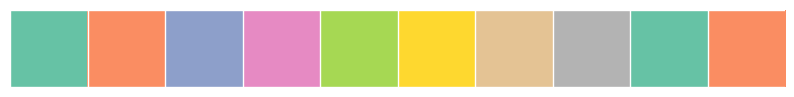

In [92]:
sns.palplot(sns.color_palette("Set2", 10))